<!-- TITLE: Extracellular potentials from neuron simulation -->
<!-- AUTHOR: Solveig Naess -->
<!--  -->
<!-- DATE: today -->

<!-- TOC: on -->



<!-- --- begin exercise --- -->

## Exercise 1: Record extracellular potential from spiking neuron


**a)**
**Create electrode array**
<linebreak> To study how the extracellular potential changes over time, we want to create an electrode array. Imagine that you stick an electrode into the extracellular medium, such that it is oriented parallel to the neuron (i.e. parallel to the z-axis). Run the code cells below to simulate the cell, create an electrode array and virtually record extracellular potentials.

In [1]:
%matplotlib inline

import LFPy
import numpy as np
from pylab import *
from matplotlib.collections import PolyCollection
from ipywidgets import widgets, fixed
from neuron import h

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def custom_fun():
    h.soma.insert('hh')

def potentials_electrode_array(morphology,
                               synapse_xpos,
                               synapse_zpos,
                               syn_weight,
                               stimulation_time,
                               active_soma,
                               array_xpos,
                               array_npoints,
                               rot):
    cell_parameters = {
        'morphology' : morphology, # from Mainen & Sejnowski, J Comput Neurosci, 1996
        'cm' : 1.0,         # membrane capacitance
        'Ra' : 150.,        # axial resistance
        'v_init' : -65.,    # initial crossmembrane potential
        'passive' : True,   # turn on NEURONs passive mechanism for all sections
        'passive_parameters' : {'g_pas' : 1./30000, 'e_pas' : -65},
        'dt' : 2.**-3,      # simulation time step size
        'tstart' : 0.,      # start time of simulation, recorders start at t=0
        'tstop' : 100.,     # stop simulation at 100 ms.
    }

    if active_soma:
        cell_parameters['custom_fun'] = [custom_fun]
        cell_parameters['custom_fun_args'] = [{}]

    cell = LFPy.Cell(**cell_parameters)
 #   cell.set_rotation(x=4.99, y=-4.33, z=3.14)
    cell.set_rotation(x=rot[0], y=rot[1], z=rot[2])

    synapse_parameters = {
        'idx' : cell.get_closest_idx(x=synapse_xpos, y=0., z=synapse_zpos),
        'e' : 0.,                   # reversal potential
        'syntype' : 'ExpSyn',       # synapse type
        'tau' : 5.,                 # synaptic time constant
        'weight' : syn_weight,            # synaptic weight
        'record_current' : True,    # record synapse current
    }

    # Create synapse and set time of synaptic input
    synapse = LFPy.Synapse(cell, **synapse_parameters)
    synapse.set_spike_times(np.array([stimulation_time]))

    # simulate cell
    cell.simulate(rec_imem=True, rec_vmem=True)
    electrode_array_parameters = {
        'sigma' : 0.3,
        'x' : np.ones(array_npoints)*array_xpos,
        'y' : np.zeros(array_npoints),
        'z' : np.linspace(0,1000., num=array_npoints),
    }
    electrode_array = LFPy.RecExtElectrode(cell,**electrode_array_parameters)

    clrs = cm.viridis(np.linspace(0,1,num=len(electrode_array_parameters['x'])))
    fig = plt.figure()
    ax1 = subplot2grid((1,3),(0,2))
    zips = []
    for x, z in cell.get_idx_polygons():
        zips.append(list(zip(x, z)))
    polycol = PolyCollection(zips,
                             edgecolors='none',
                             facecolors='k')
    ax1.add_collection(polycol)
    ax1.plot(cell.xmid[cell.synidx], cell.zmid[cell.synidx], 'ro', ms = 5.)
    for i in range(len(clrs)):
        ax1.plot(electrode_array_parameters['x'][i], electrode_array_parameters['z'][i], 'o', color=clrs[i], ms = 5.)
    ax1.axis('off')

    electrode_array.calc_lfp()
    potentials = electrode_array.LFP

    ax2 = plt.subplot2grid((1,3),(0,0))
    for i in range(len(clrs)):
        ax2.plot(cell.tvec, potentials[i]*1e6, color=clrs[i], lw = 3.)
    ax2.set_xlabel('time [ms]')
    ax2.set_ylabel('potential [nV]')
    ax3 = plt.subplot2grid((1,3),(0,1))
    ax3.plot(cell.tvec, cell.vmem[0])
    ax3.set_xlabel('t [ms]')
    ax3.set_ylabel('soma potential [mV]')

    plt.show()

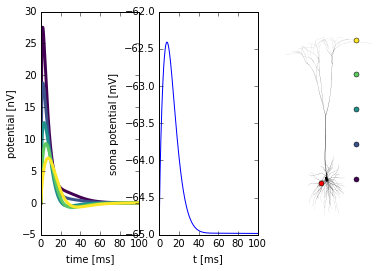

In [3]:
morphology = './cells/j4a.hoc'
rotation = [4.99, -4.33, 3.14]
slider = widgets.interact(potentials_electrode_array, morphology=fixed(morphology),
                          synapse_xpos=widgets.IntSlider(min=-200.,max=200.,step=10.,value=0.),
                          synapse_zpos=widgets.IntSlider(min=-200.,max=1400.,step=10.,value=600.),
                          syn_weight=widgets.FloatSlider(min=0.,max=.1,step=.0001,value=0.03),
                          active_soma=False,
                          stimulation_time = widgets.IntSlider(min=0.,max=80.,step=10.,value=20.),
                          rot = fixed(rotation),
                          array_xpos = widgets.IntSlider(min=0., max = 10000, step = 100, value = 400),
                          array_npoints = fixed(5),
                          )

**b)**
Use the sliders to study how the extracellular potentials depend on the distance from the neuron. Can you explain the shape of the extracellular potentials based on the recording sites?

**c)**
Now try to turn the Hodgkin-Huxley mechanism in the soma on. Change the parameters using the sliders, to make the neuron spike. How does the spiking affect the potentials measured by the electrode array? Does this change when you move the electrode far away from the neuron?

<!-- --- end exercise --- -->